In [ ]:
import pandas as pd
import zipfile
import io
import requests
# Load the dataset from the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("bank-full.csv") as f:
        df = pd.read_csv(f, delimiter=';', encoding='latin1')
# Display the first few rows of the dataset
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target variable
X = df.drop('y', axis=1)  # 'y' is the target variable
y = df['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8747419640224122
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564



In [ ]:
import pandas as pd
import zipfile
import io
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Step 3: Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8750368622825125
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.47      0.47      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.88      0.87     13564



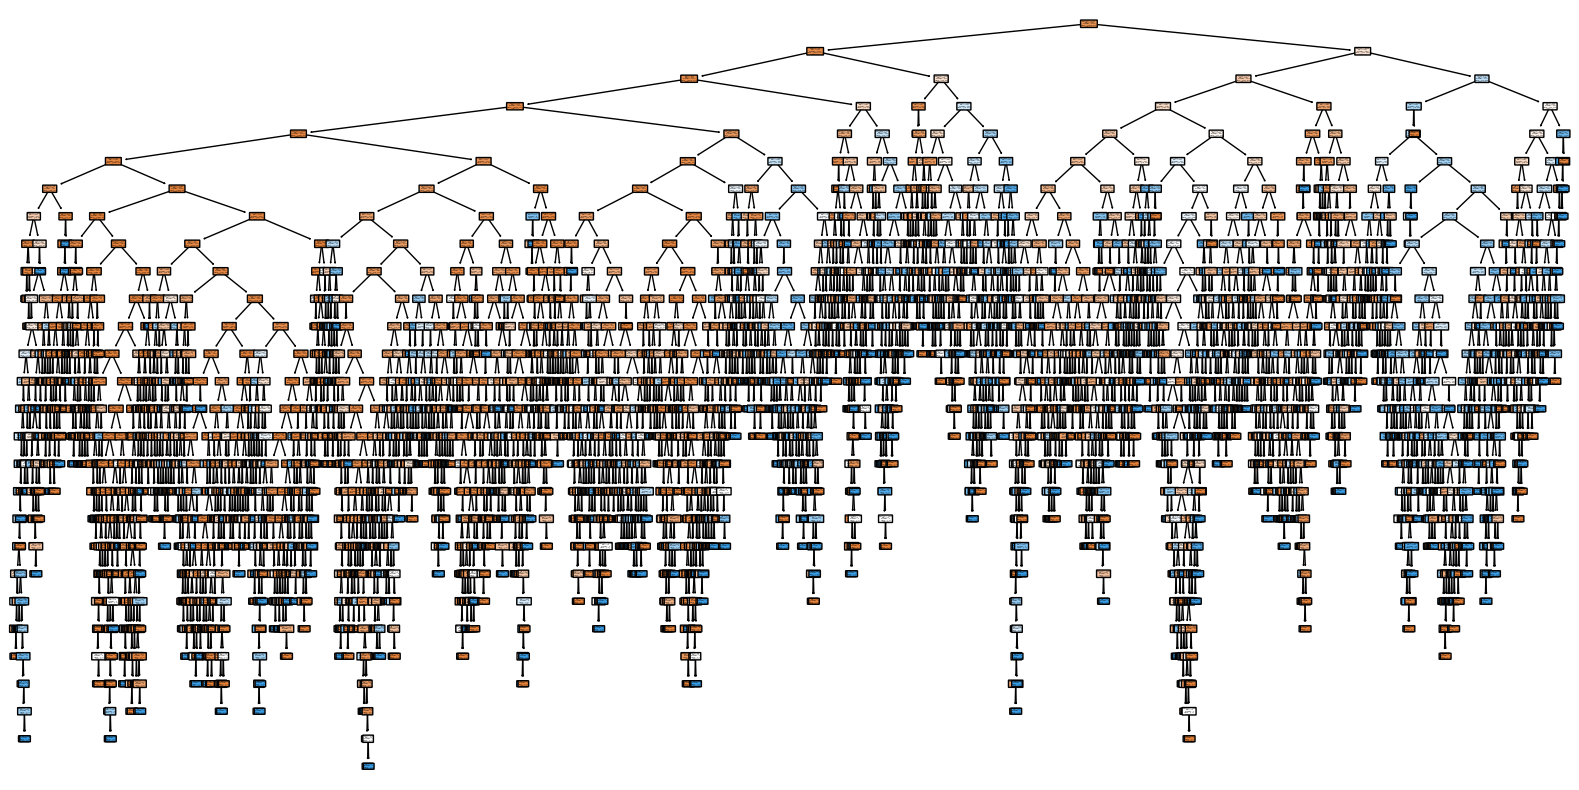

In [ ]:
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True, rounded=True)
plt.show()

In [ ]:
# Train a smaller Decision Tree Classifier
clf_small = DecisionTreeClassifier(max_depth=3)  # Limiting the depth of the tree
clf_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

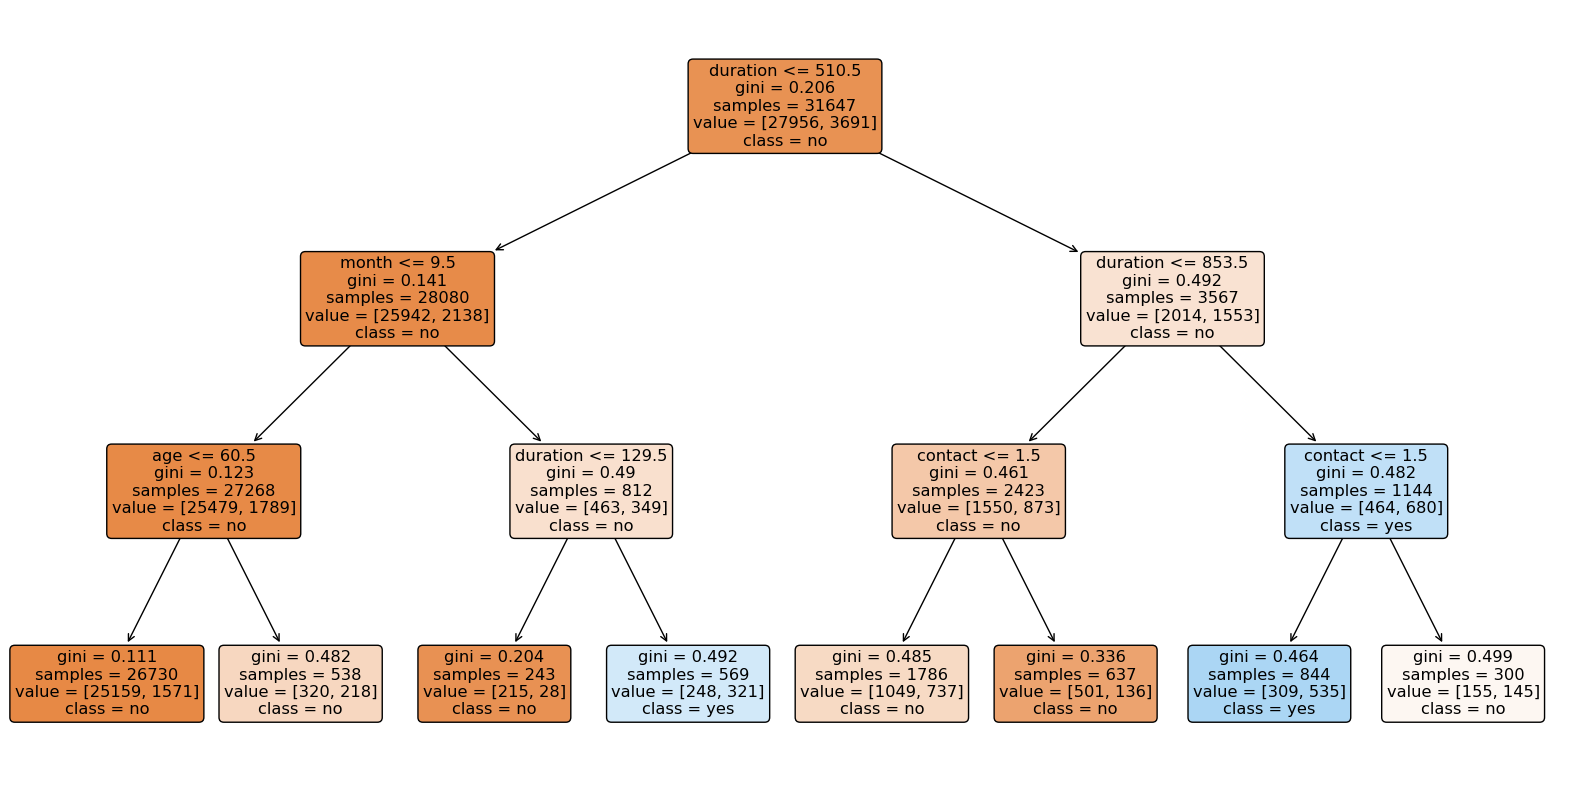

In [ ]:
# Plot the smaller decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(
    clf_small,
    feature_names=X.columns,
    class_names=label_encoders['y'].classes_,
    filled=True,
    rounded=True
)
# Display the plot
plt.show()